In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
credit_data = pd.read_csv('datasets/combined.csv')
credit_data.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Term,Years in current job,Home Ownership,Purpose,Number of Credit Problems,Bankruptcies,Tax Liens
0,1,445412.0,709.0,1167493.0,5214.74,17.2,6.0,228190.0,416746.0,Short Term,8 years,Home Mortgage,Home Improvements,>= 1,>= 1,0
1,1,347666.0,721.0,806949.0,8741.90,12.0,9.0,256329.0,386958.0,Long Term,3 years,Own Home,Debt Consolidation,0,0,0
2,1,217646.0,730.0,1184194.0,10855.08,19.6,13.0,122170.0,272052.0,Short Term,< 1 year,Home Mortgage,Debt Consolidation,>= 1,>= 1,0
3,1,548746.0,678.0,2559110.0,18660.28,22.6,4.0,437171.0,555038.0,Short Term,2 years,Rent,Debt Consolidation,0,0,0
4,1,215952.0,739.0,1454735.0,39277.75,13.9,20.0,669560.0,1021460.0,Short Term,< 1 year,Rent,Debt Consolidation,0,0,0


# Logistic Regression

Predict probability of categorical dependent variable (Loan Status) using categorical variables (Term, Years in current job, Home Ownership, Purpose, Number of Credit Problems, Bankruptcies, Tax Liens) in the dataset

In [3]:
pred = credit_data.loc[:, credit_data.columns != "Loan Status"]
pred

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Term,Years in current job,Home Ownership,Purpose,Number of Credit Problems,Bankruptcies,Tax Liens
0,445412.0,709.0,1167493.0,5214.74,17.2,6.0,228190.0,416746.0,Short Term,8 years,Home Mortgage,Home Improvements,>= 1,>= 1,0
1,347666.0,721.0,806949.0,8741.90,12.0,9.0,256329.0,386958.0,Long Term,3 years,Own Home,Debt Consolidation,0,0,0
2,217646.0,730.0,1184194.0,10855.08,19.6,13.0,122170.0,272052.0,Short Term,< 1 year,Home Mortgage,Debt Consolidation,>= 1,>= 1,0
3,548746.0,678.0,2559110.0,18660.28,22.6,4.0,437171.0,555038.0,Short Term,2 years,Rent,Debt Consolidation,0,0,0
4,215952.0,739.0,1454735.0,39277.75,13.9,20.0,669560.0,1021460.0,Short Term,< 1 year,Rent,Debt Consolidation,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49163,666666.0,725.0,3838380.0,48939.44,12.4,18.0,507414.0,1004322.0,Short Term,7 years,Home Mortgage,Debt Consolidation,0,0,0
49164,758450.0,726.0,1590775.0,24259.39,18.1,11.0,850820.0,1287792.0,Short Term,10+ years,Home Mortgage,Debt Consolidation,0,0,0
49165,210584.0,719.0,783389.0,3727.61,17.4,6.0,456.0,259160.0,Short Term,1 year,Home Mortgage,Other,0,0,0
49166,103136.0,742.0,1150545.0,7315.57,18.8,12.0,109554.0,537548.0,Short Term,6 years,Rent,Debt Consolidation,>= 1,>= 1,0


In [4]:
# convert categorical data into indicator variables 
pred = pd.get_dummies(pred,prefix = ["Term","Years in current job","Home Ownership","Purpose","Number of Credit Problems","Bankruptcies","Tax Liens"] ,columns = ["Term","Years in current job","Home Ownership","Purpose","Number of Credit Problems","Bankruptcies","Tax Liens"])
pred

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Term_Long Term,Term_Short Term,...,Purpose_Small Business,Purpose_Take a Trip,Purpose_Vacation,Purpose_Wedding,Number of Credit Problems_0,Number of Credit Problems_>= 1,Bankruptcies_0,Bankruptcies_>= 1,Tax Liens_0,Tax Liens_>= 1
0,445412.0,709.0,1167493.0,5214.74,17.2,6.0,228190.0,416746.0,False,True,...,False,False,False,False,False,True,False,True,True,False
1,347666.0,721.0,806949.0,8741.90,12.0,9.0,256329.0,386958.0,True,False,...,False,False,False,False,True,False,True,False,True,False
2,217646.0,730.0,1184194.0,10855.08,19.6,13.0,122170.0,272052.0,False,True,...,False,False,False,False,False,True,False,True,True,False
3,548746.0,678.0,2559110.0,18660.28,22.6,4.0,437171.0,555038.0,False,True,...,False,False,False,False,True,False,True,False,True,False
4,215952.0,739.0,1454735.0,39277.75,13.9,20.0,669560.0,1021460.0,False,True,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49163,666666.0,725.0,3838380.0,48939.44,12.4,18.0,507414.0,1004322.0,False,True,...,False,False,False,False,True,False,True,False,True,False
49164,758450.0,726.0,1590775.0,24259.39,18.1,11.0,850820.0,1287792.0,False,True,...,False,False,False,False,True,False,True,False,True,False
49165,210584.0,719.0,783389.0,3727.61,17.4,6.0,456.0,259160.0,False,True,...,False,False,False,False,True,False,True,False,True,False
49166,103136.0,742.0,1150545.0,7315.57,18.8,12.0,109554.0,537548.0,False,True,...,False,False,False,False,False,True,False,True,True,False


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
lr = LogisticRegression()

resp = pd.read_csv("datasets/combined.csv",usecols = ['Loan Status'])

# random split the dataset into test and train
train_pred, test_pred, train_resp, test_resp = train_test_split(pred,resp,test_size = 0.25, random_state = 42)

# fit the logistic regression model with train dataset
lr.fit(train_pred,train_resp)

train_accuracy = lr.score(train_pred,train_resp)
print('Accuracy on the train set: {:.2f}'.format(train_accuracy))

resp_pred = lr.predict(test_pred)
test_accuracy = accuracy_score(test_resp,resp_pred)
print('Accuracy on the test set: {:.2f}'.format(test_accuracy))

Accuracy on the train set: 0.77
Accuracy on the test set: 0.77


In [6]:
from sklearn.feature_selection import RFE

# get the rank of importance of predictors
selector = RFE(lr, n_features_to_select = 1)
selector = selector.fit(train_pred,train_resp["Loan Status"].ravel())

In [7]:
importances = selector.ranking_
indices = np.argsort(importances)[::1]

# Print the feature rankings
print("Ranking of variables that determine the loan status:")
for f in range(train_pred.shape[1]):
    print(f"{f+1}. {train_pred.columns[indices[f]]}")

Ranking of variables that determine the loan status:
1. Term_Short Term
2. Home Ownership_Rent
3. Bankruptcies_0
4. Number of Credit Problems_0
5. Home Ownership_Home Mortgage
6. Purpose_Debt Consolidation
7. Tax Liens_0
8. Number of Open Accounts
9. Years of Credit History
10. Term_Long Term
11. Credit Score
12. Monthly Debt
13. Current Loan Amount
14. Annual Income
15. Maximum Open Credit
16. Current Credit Balance
17. Bankruptcies_>= 1
18. Number of Credit Problems_>= 1
19. Years in current job_10+ years
20. Years in current job_2 years
21. Years in current job_3 years
22. Home Ownership_Own Home
23. Years in current job_1 year
24. Years in current job_4 years
25. Years in current job_< 1 year
26. Purpose_Other
27. Years in current job_7 years
28. Years in current job_6 years
29. Purpose_Business Loan
30. Years in current job_5 years
31. Purpose_Buy a Car
32. Years in current job_8 years
33. Purpose_Home Improvements
34. Purpose_Small Business
35. Purpose_Take a Trip
36. Tax Liens_>

In [8]:
# calculate performance metrics to show accuracy, precision and recall
# precision: percent of correct prediction: TP/(TP+FP)
# recall: percert of positive cases caught: TP/(TP+FN)
# F1 score: percent of positive prediction that were correct: use to compare classifier models, not global accuracy

print(classification_report(test_resp,resp_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2832
           1       0.77      1.00      0.87      9460

    accuracy                           0.77     12292
   macro avg       0.88      0.50      0.44     12292
weighted avg       0.82      0.77      0.67     12292



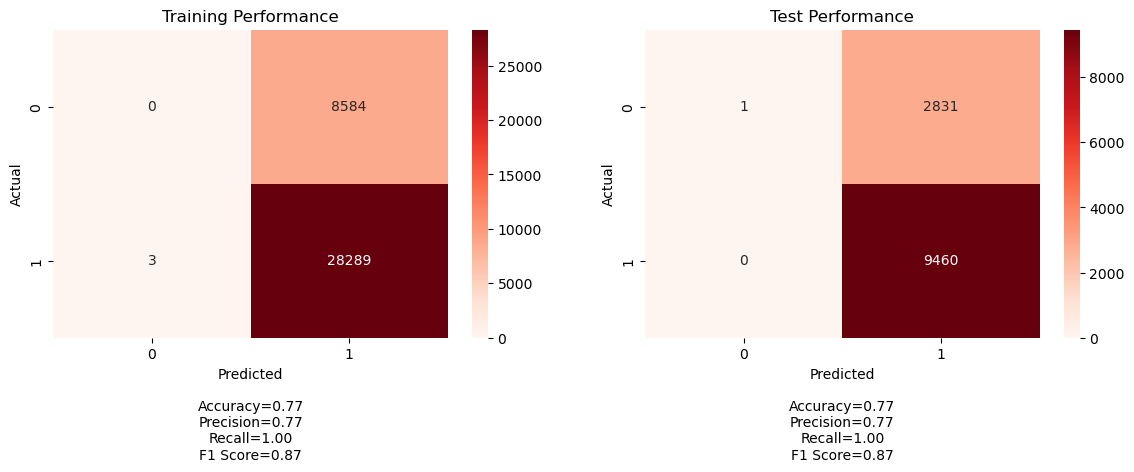

In [9]:
from sklearn.metrics import confusion_matrix

resp_pred_train = lr.predict(train_pred)

f, ax = plt.subplots(ncols=2, figsize=(14, 4))

cm_train = confusion_matrix(train_resp,resp_pred_train)
sb.heatmap(cm_train,annot=True,fmt='d',cmap='Reds',ax=ax[0])
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

accuracy_train = np.trace(cm_train) / float(np.sum(cm_train))
precision_train = cm_train[1,1] / sum(cm_train[:,1])
recall_train = cm_train[1,1] / sum(cm_train[1,:])
f1_score_train = 2 * precision_train * recall_train / (precision_train + recall_train)

stats_text_train = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
    accuracy_train, precision_train, recall_train, f1_score_train)

ax[0].set(xlabel='Predicted' + stats_text_train, 
          ylabel='Actual', title='Training Performance')

cm = confusion_matrix(test_resp,resp_pred)
sb.heatmap(cm,annot=True,fmt='d',cmap='Reds')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

accuracy_test = np.trace(cm) / float(np.sum(cm))
precision_test = cm[1,1] / sum(cm[:,1])
recall_test = cm[1,1] / sum(cm[1,:])
f1_score_test = 2 * precision_test * recall_test / (precision_test + recall_test)
    
stats_text_test = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
    accuracy_test, precision_test, recall_test, f1_score_test)
    
ax[1].set(xlabel='Predicted' + stats_text_test, 
              ylabel='Actual', title='Test Performance')
    
plt.show()